# <font color= darkred>By: Gyan Bahadur Magar</font>
# <font color= darkyellow>The Sparks Foudation - Intership (Feb 2021)</font>
## <font color = darkblue>Task 6: Prediction using Decision Tree Algorithm</font>
#### Create the Decision Tree classifier and visualize it graphically.
#### The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.


In [1]:
# importing standard libraries
import pandas as pd
import numpy as np

In [2]:
"""The given Iris CSV file is download/saved and importing"""
data=pd.read_csv("Iris.csv")

In [3]:
"""First 5 rows """
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 6)

#  we have 150 rows/ records and 6 columns

In [5]:
#sanity check a
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#  We checked there in no null values, we are clear go Visualization and analysis

In [6]:
import seaborn as sb

C:\Users\ANJU\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


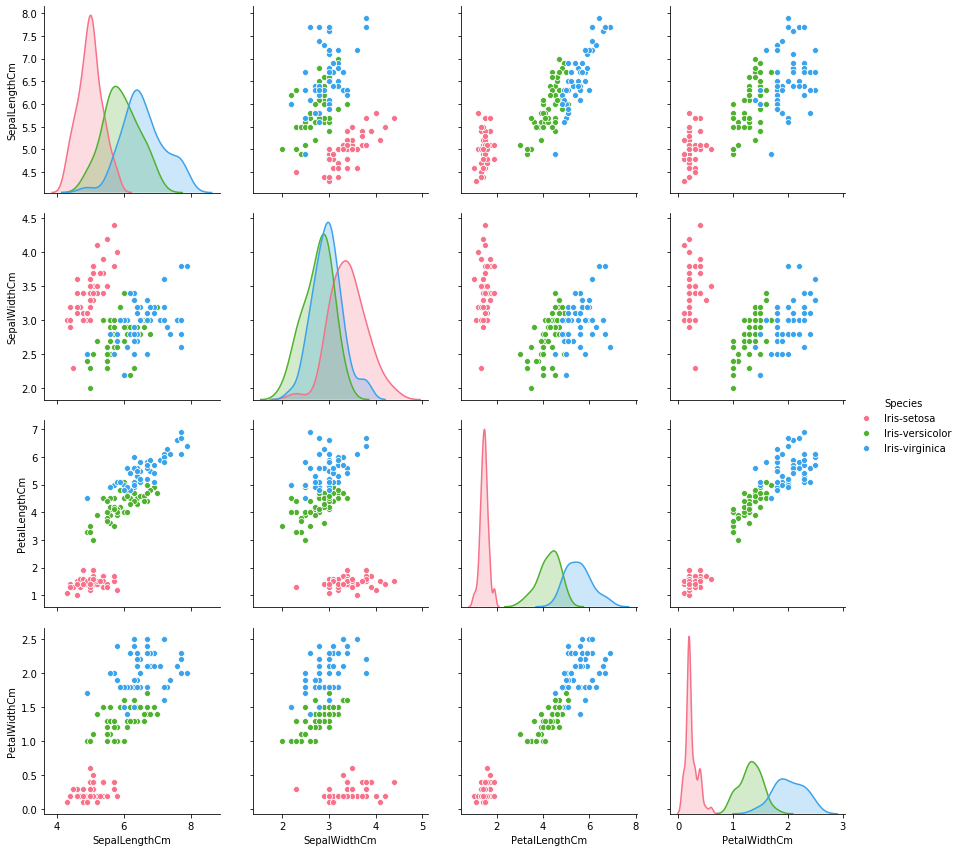

In [7]:
pairplot=sb.pairplot(data.drop("Id", axis=1), hue="Species", palette="husl", size=3)

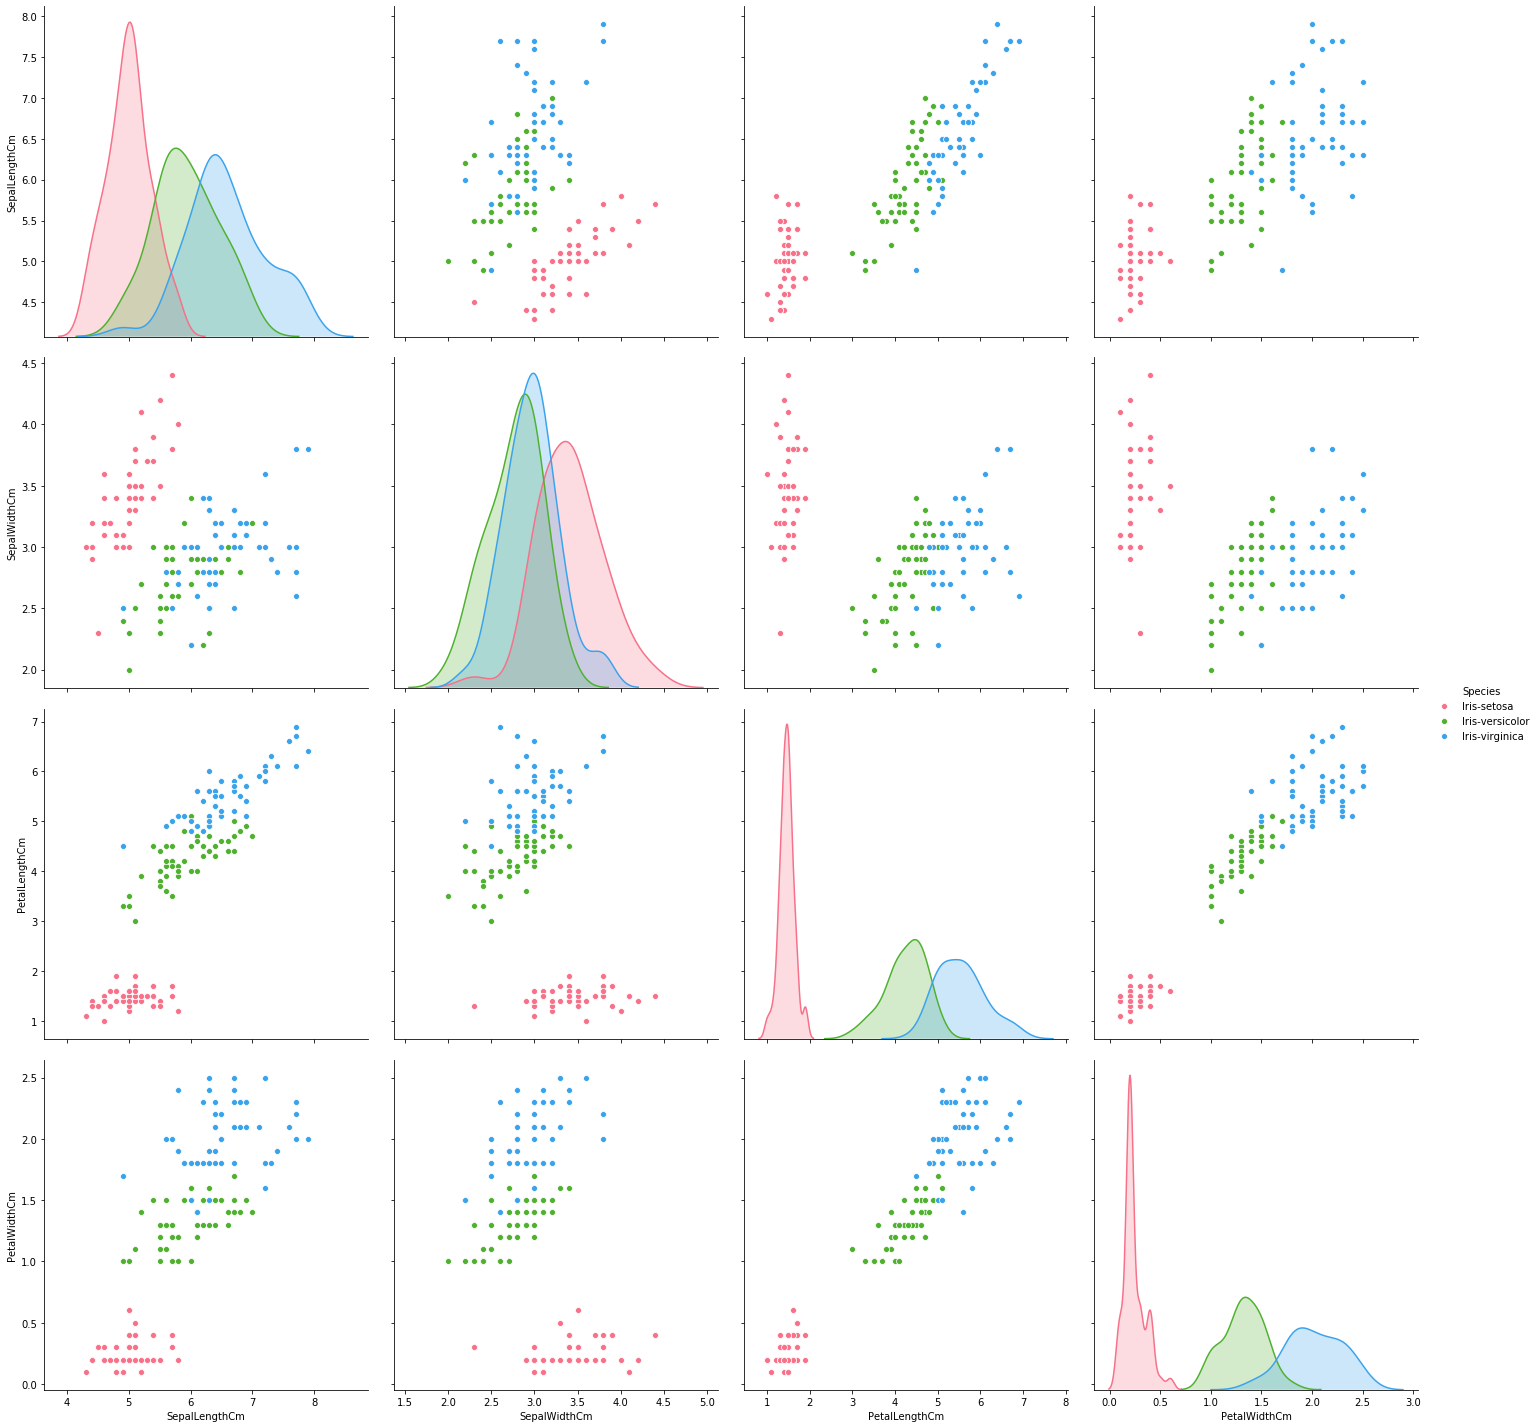

In [8]:
sb.pairplot(data.drop("Id", axis=1), hue="Species", palette="husl", size=5)

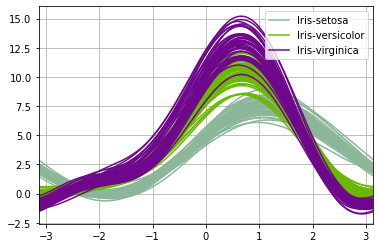

In [9]:
iris_plot=pd.plotting.andrews_curves(data.drop("Id", axis=1), "Species")

In [10]:
#categorical record 
data["Species"].describe()

count             150
unique              3
top       Iris-setosa
freq               50
Name: Species, dtype: object

In [11]:
len(data["Species"].unique())

3

In [12]:
#train x and y
x=data.drop("Species",axis=1)
x=pd.get_dummies(x)
y=data["Species"]

In [13]:
import sklearn.model_selection as model_selection

In [14]:
#random_state = 1 to get same records.
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y, test_size=0.2, random_state=1)

In [15]:
len(x_train)

120

# 1. Decision Tree using Classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
clf=DecisionTreeClassifier(max_depth=3)
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [18]:
clf.score(x_test,y_test)

0.9666666666666667

In [19]:
import pydotplus
import os
import graphviz

In [20]:
#rom sklearn.tree import export_graphviz
#export_graphviz(clf, out_file = X_train.columns,filled=True, rounded=True, special_characters=True)

In [21]:
from sklearn.tree import export_graphviz
dot=export_graphviz(clf,feature_names=x_train.columns,filled=True,class_names=True, rounded=True,proportion=True)

In [22]:
graph=pydotplus.graph_from_dot_data(dot)

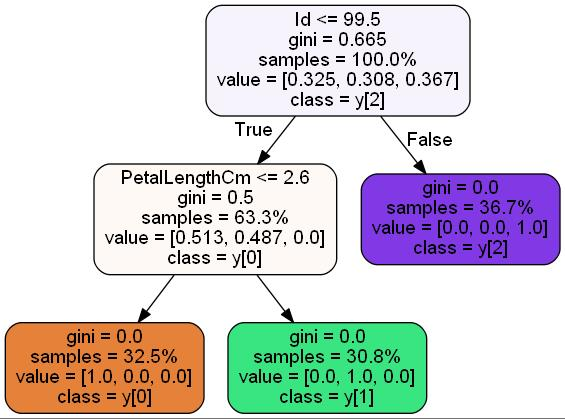

In [23]:
from IPython.display import Image
Image(graph.create_jpeg())

In [24]:
y_train.value_counts()/len(y_train)

Iris-virginica     0.366667
Iris-setosa        0.325000
Iris-versicolor    0.308333
Name: Species, dtype: float64

In [25]:
x_train.shape

(120, 5)

In [26]:
#GridSearch
from sklearn.model_selection import GridSearchCV
model=GridSearchCV(clf,param_grid={'max_depth':[4,3,5,2,7,6],'criterion':['gini','entropy']},cv=5,n_jobs=-1)
model.fit(x_train,y_train)

C:\Users\ANJU\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 3, 5, 2, 7, 6]},
             pre_dispat

In [27]:
#What is the best value for max_depth, purity metric
model.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [28]:
model.best_score_

1.0

In [29]:
#Which is my best model?
dt_c=model.best_estimator_

In [30]:
#Area under the curve
prob=dt_c.predict_proba(x_test)[:] #class1

In [31]:
prob

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [32]:
#from sklearn.metrics import roc_auc_score
#roc_auc_score(y_test,prob)

In [33]:
dt_c.feature_importances_

array([1., 0., 0., 0., 0.])

In [34]:
clf.score(x_test, y_test)

0.9666666666666667

In [35]:
pd.Series(dt_c.feature_importances_,index=x_train.columns).sort_values(ascending=False)

Id               1.0
PetalWidthCm     0.0
PetalLengthCm    0.0
SepalWidthCm     0.0
SepalLengthCm    0.0
dtype: float64